In [ ]:
# Here I am using three data sets from Kaggle, Global Video Game Sales & Ratings (the devastator), video game prices (2022; the devastator) and Popular Video Games 1980 - 2023 (randomarnab) 
# I will do a sales analysis, a ratings analysis, a price analysis, a popular games analysis, a recommendation system and a clustered analysis


In [79]:
# Its Sales Analysis time! ,Import and check for missing values.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('globesale.csv')
print(df.columns)
df.head()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df.columns = df.columns.str.lower()
print(df['global_sales'].isnull().sum())
#removing all zero values dropped about 14k rows
df = df[(df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']] != 0).all(axis=1)]
df= df.sort_values('name', ascending=True)
df.info()
print(df['year_of_release'].min())  # First year
print(df['year_of_release'].max())  # Last year


0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2393 entries, 1079 to 7150
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2393 non-null   object 
 1   platform         2393 non-null   object 
 2   year_of_release  2380 non-null   float64
 3   genre            2393 non-null   object 
 4   publisher        2392 non-null   object 
 5   na_sales         2393 non-null   float64
 6   eu_sales         2393 non-null   float64
 7   jp_sales         2393 non-null   float64
 8   other_sales      2393 non-null   float64
 9   global_sales     2393 non-null   float64
 10  critic_score     1729 non-null   float64
 11  critic_count     1729 non-null   float64
 12  user_score       1789 non-null   object 
 13  user_count       1757 non-null   float64
 14  developer        1793 non-null   object 
 15  rating           1787 non-null   object 
dtypes: float64(9), object(7)
memory usage: 317.8+ KB
1983.0

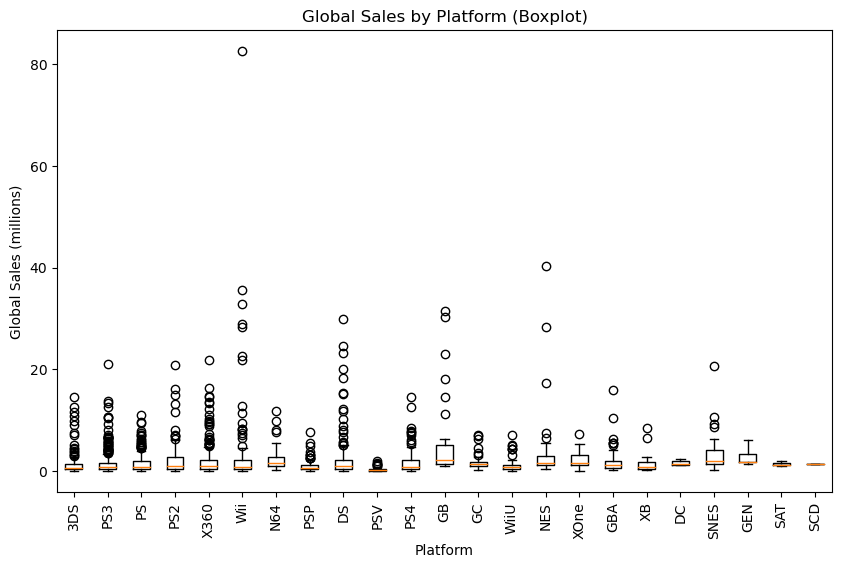

In [53]:
#Lets Visualize this but first change the sales to decimals
plt.figure(figsize=(10,6))
plt.boxplot([df[df['platform']== platform]['global_sales'] for platform in df['platform'].unique()])
plt.xticks(range(1, len(df['platform'].unique()) +1), df['platform'].unique(), rotation=90)
plt.ylabel('Global Sales (millions)')
plt.xlabel('Platform')
plt.title('Global Sales by Platform (Boxplot)')
plt.show()

In [60]:
df.columns


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [70]:
pivot_df = pd.pivot_table(df, index='year_of_release', columns='platform', values='global_sales', aggfunc=np.sum)
print(pivot_df.head(34))

platform           3DS    DC      DS     GB    GBA     GC   GEN    N64    NES  \
year_of_release                                                                 
1983.0             NaN   NaN     NaN    NaN    NaN    NaN   NaN    NaN   8.82   
1984.0             NaN   NaN     NaN    NaN    NaN    NaN   NaN    NaN  45.33   
1985.0             NaN   NaN     NaN    NaN    NaN    NaN   NaN    NaN  49.44   
1986.0             NaN   NaN     NaN    NaN    NaN    NaN   NaN    NaN  22.37   
1987.0             NaN   NaN     NaN    NaN    NaN    NaN   NaN    NaN  10.61   
1988.0             NaN   NaN     NaN   1.43    NaN    NaN   NaN    NaN  37.95   
1989.0             NaN   NaN     NaN  62.60    NaN    NaN   NaN    NaN   6.69   
1990.0             NaN   NaN     NaN   4.56    NaN    NaN  2.60    NaN   9.75   
1991.0             NaN   NaN     NaN   2.90    NaN    NaN  4.34    NaN   5.51   
1992.0             NaN   NaN     NaN  25.25    NaN    NaN  7.69    NaN   1.91   
1993.0             NaN   NaN

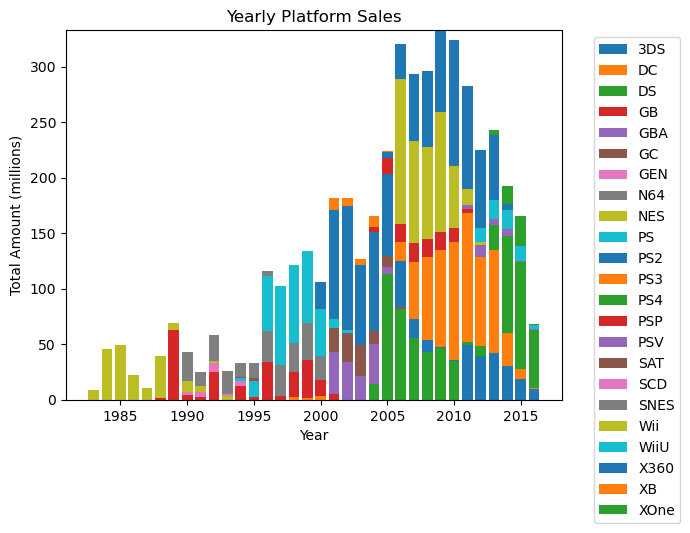

In [78]:
#NES most pop from 83 to 90, gameboy from 89, N64 from 96 to 2000. PS2 in 2001 to 2006, wii and DS 2007 to 2013, and wii and xbox from 2014 to 2016. After only PS4 and Xbone
cols = pivot_df.columns
index = pivot_df.index
plt.bar(index, pivot_df[cols[0]], label=cols[0])
for i in range(1, len(cols)):
    plt.bar(index, pivot_df[cols[i]], bottom=pivot_df[cols[:i]].sum(axis=1), label=cols[i])
plt.xlabel('Year')
plt.ylabel('Total Amount (millions)')
plt.title('Yearly Platform Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [82]:
#Ok time to analyze game ratings with sales
df = pd.read_csv('globesale.csv')
df.columns


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

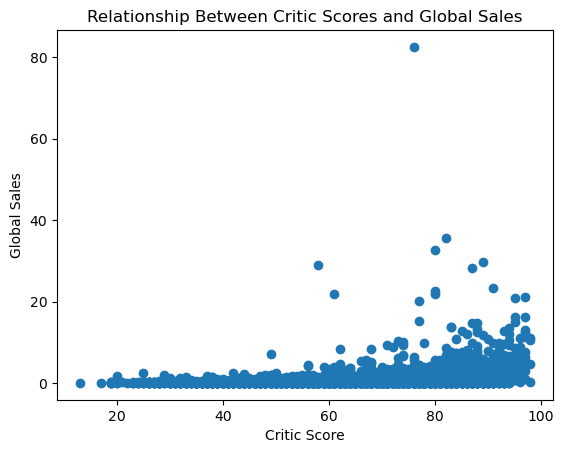

In [83]:
plt.scatter(df['Critic_Score'], df['Global_Sales'])
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.title('Relationship Between Critic Scores and Global Sales')
plt.show()

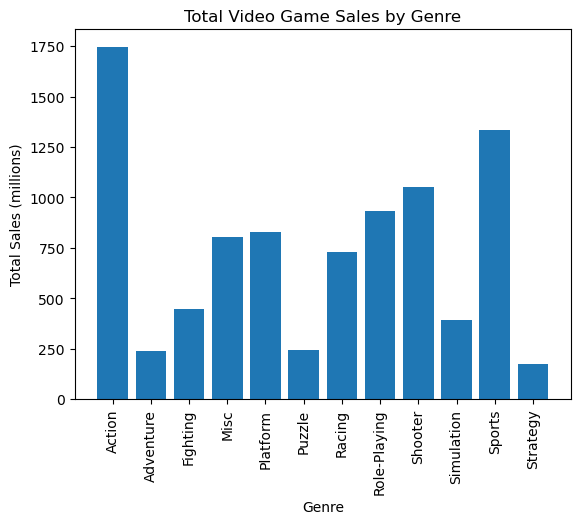

In [85]:
#higher rated games simply sell better
genre_sales = df.groupby('Genre')['Global_Sales'].sum()
plt.bar(genre_sales.index, genre_sales.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.title('Total Video Game Sales by Genre')
plt.show()

In [87]:
#This is over time from 1983 to 2016
# now to do some price analysis
df_prices = pd.read_csv('gameprices.csv')
print(df_prices.head())

   Unnamed: 0      Origen      Tienda Fabricante Consola       Género  \
0           0  Mediamarkt  Mediamarkt     Capcom     PS5       Acción   
1           1  Mediamarkt  Mediamarkt       Sony     PS5  Plataformas   
2           2  Mediamarkt  Mediamarkt    Ubisoft     PS5       Acción   
3           3  Mediamarkt  Mediamarkt    Ubisoft     PS5       Acción   
4           4  Mediamarkt  Mediamarkt        NaN     PS5       Terror   

                                              Título Precio Moneda  \
0             Resident Evil VIII: Village Lenticular  42.99    EUR   
1                           Sackboy: A Big Adventure  59.99    EUR   
2                     Tom Clancy's Rainbow Six Siege   9.99    EUR   
3  Assassin's Creed Valhalla: El Amanecer del Rag...  34.99    EUR   
4                                              Yuoni  29.99    EUR   

  Disponibilidad  
0           True  
1           True  
2           True  
3           True  
4           True  


In [89]:
print(df_prices.isna().sum())


Unnamed: 0           0
Origen               0
Tienda               0
Fabricante         273
Consola           2489
Género            2526
Título              21
Precio               0
Moneda               0
Disponibilidad       0
dtype: int64


In [135]:
df_prices = df_prices.dropna()

In [136]:
df_prices = df_prices.rename(columns={
    'Origen': 'source',
    'Tienda': 'store',
    'Fabricante': 'manufacturer',
    'Consola': 'console',
    'Género': 'genre',
    'Título': 'title',
    'Precio': 'price',
    'Moneda': 'currency',
    'Disponibilidad': 'availability'
})


In [137]:
df_prices['price'] = df_prices['price'].astype(float)
df_prices['availability'] = df_prices['availability'].astype(bool)
print(df_prices.dtypes)

Unnamed: 0        int64
source           object
store            object
manufacturer     object
console          object
genre            object
title            object
price           float64
currency         object
availability       bool
dtype: object


In [138]:
df_mean_prices = df_prices.groupby('console').mean()[['price']]

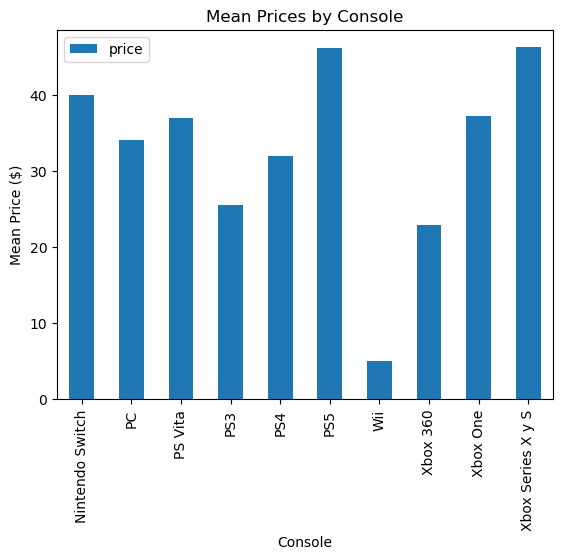

In [139]:
df_mean_prices.plot(kind='bar')
plt.title('Mean Prices by Console')
plt.xlabel('Console')
plt.ylabel('Mean Price ($)')
plt.show()

In [143]:
#yeap prices increasing as we get to new iterations of consoles.
#ok lets do a popular game analysis
df_pop = pd.read_csv('popgames.csv')
print(df_pop.shape)
print(df_pop.info())
print(df_pop.isnull().sum())

(1512, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB
None
Unnamed: 0            0
Title               

In [145]:
print(df_pop.isna().sum())
df_pop.dropna(inplace=True)

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64


In [166]:
def parse_plays(s):
    try:
        s = str(s)
        return int(s.replace(',', '').replace('K', '000'))
    except ValueError:
        return np.nan

df_pop['Plays'] = df_pop['Plays'].apply(parse_plays)
df_pop['Number of Reviews'] = df_pop['Number of Reviews'].apply(lambda x: int(float(x[:-1]) * 1000) if isinstance(x, str) and x[-1] == 'K' else int(x) if isinstance(x, str) else x)
df_pop['Backlogs'] = df_pop['Backlogs'].apply(lambda x: int(float(x[:-1]) * 1000) if isinstance(x, str) and x[-1] == 'K' else int(x) if isinstance(x, str) else x)
df_pop['Wishlist'] = df_pop['Wishlist'].apply(lambda x: int(float(x[:-1]) * 1000) if isinstance(x, str) and x[-1] == 'K' else int(x) if isinstance(x, str) else x)
problematic_rows = df_pop[pd.to_datetime(df_pop['Release Date'], errors='coerce').isna()]
print(problematic_rows)
df_pop['Release Date'] = pd.to_datetime(df_pop['Release Date'], errors='coerce', format='%b %d, %Y')


      Unnamed: 0                              Title     Release Date  \
644          644                          Deltarune  releases on TBD   
1252        1252  Elden Ring: Shadow of the Erdtree  releases on TBD   

                                                Team  Rating Times Listed  \
644                                      ['tobyfox']     4.3          313   
1252  ['FromSoftware', 'Bandai Namco Entertainment']     4.8           18   

      Number of Reviews                                            Genres  \
644                 313  ['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']   
1252                 18                              ['Adventure', 'RPG']   

                                                Summary  \
644   UNDERTALE's parallel story, DELTARUNE. Meet ne...   
1252  An expansion to Elden Ring setting players on ...   

                                                Reviews  Plays Playing  \
644   ['Spamton is so hot, I want to kiss him in the...    NaN     

In [162]:
print(df_pop.columns)

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')


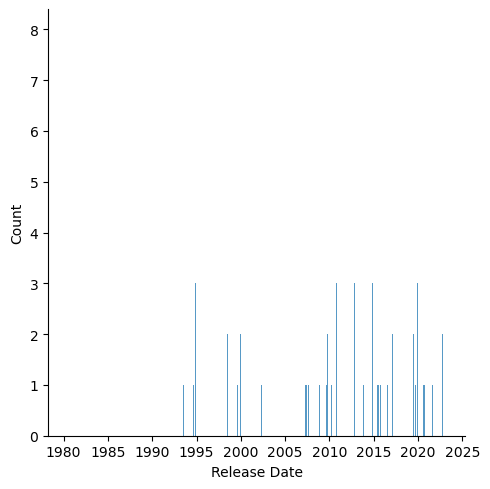

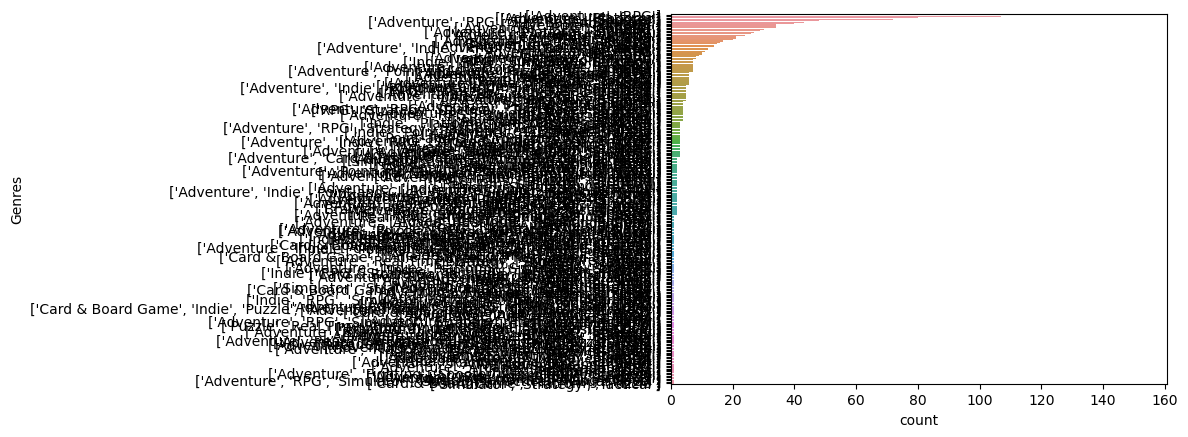

In [177]:
#distribution of release dates and genres:
sns.displot(df_pop, x='Release Date', binwidth=1)
plt.show()

sns.countplot(data=df_pop, y='Genres', order=df_pop['Genres'].value_counts().index)
plt.show()

In [173]:
# popularity of games by counting the number of times each game appears in the dataset
df_pop['Title'].value_counts().head(10)

Doom                      7
Dead Space                5
Shadow of the Colossus    5
Resident Evil 2           5
God of War                4
Final Fantasy VII         4
Persona 4 Golden          4
Tomb Raider               4
Minecraft                 4
Live A Live               4
Name: Title, dtype: int64

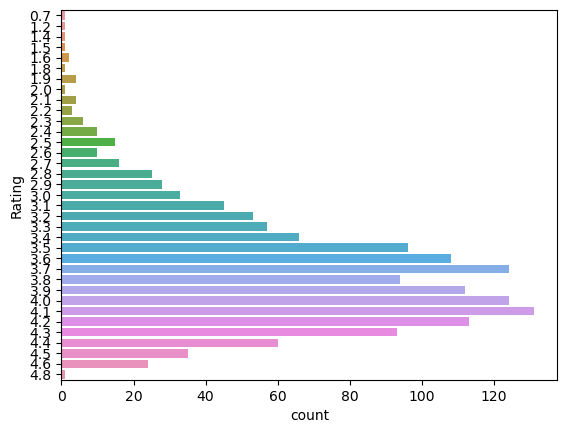

In [179]:
#Game popularity and rating
sns.countplot(data=df_pop, y='Rating')
plt.show()

In [180]:
#ok Recommendation system time!
print(df_pop.head())

   Unnamed: 0                                    Title Release Date  \
0           0                               Elden Ring   2022-02-25   
1           1                                    Hades   2019-12-10   
2           2  The Legend of Zelda: Breath of the Wild   2017-03-03   
3           3                                Undertale   2015-09-15   
4           4                            Hollow Knight   2017-02-24   

                                                Team  Rating Times Listed  \
0     ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                               ['Supergiant Games']     4.3         2.9K   
2  ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
3                                 ['tobyfox', '8-4']     4.2         3.5K   
4                                    ['Team Cherry']     4.4           3K   

   Number of Reviews                                             Genres  \
0               3900               

In [183]:
df_pop = df_pop[['Title', 'Genres', 'Summary', 'Rating', 'Number of Reviews', 'Team']]
df_pop = df_pop[df_pop.columns.sort_values()]
df_pop = df_pop.reset_index(drop=True)

In [184]:
#with the nltk lib time to use NLP on the summary and genre columns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...


True

In [188]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
     tokens = word_tokenize(text.lower())
     stop_words = set(stopwords.words('english') + list(string.punctuation))
     tokens = [token for token in tokens if token not in stop_words]
     lemmatizer = WordNetLemmatizer()
     tokens = [lemmatizer.lemmatize(token) for token in tokens]
     text = ' '.join(tokens)
     return text



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [190]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()]
    cleaned_text = " ".join(tokens)
    return cleaned_text

df_pop['Cleaned_Summary'] = df_pop['Summary'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...


In [191]:
#sentiment analysis first, top ten words and counts from the genre and summary
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_pop['Cleaned_Summary'])

word_counts = X.sum(axis=0)
word_counts_sorted = sorted(zip(vectorizer.get_feature_names(), word_counts.tolist()[0]), key=lambda x: x[1], reverse=True)

print(word_counts_sorted[:10])

[('game', 1653), ('new', 760), ('player', 745), ('world', 549), ('character', 426), ('series', 403), ('story', 342), ('time', 316), ('adventure', 289), ('battle', 272)]


C:\Users\brian\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [192]:
vectorizer = CountVectorizer(ngram_range=(2, 2)) # for bigrams
# vectorizer = CountVectorizer(ngram_range=(3, 3)) # for trigrams
X = vectorizer.fit_transform(df_pop['Cleaned_Summary'])

ngram_counts = X.sum(axis=0)
ngram_counts_sorted = sorted(zip(vectorizer.get_feature_names(), ngram_counts.tolist()[0]), key=lambda x: x[1], reverse=True)

print(ngram_counts_sorted[:10])

[('video game', 114), ('super mario', 81), ('resident evil', 73), ('final fantasy', 63), ('metal gear', 63), ('game feature', 56), ('game player', 56), ('game developed', 53), ('adventure game', 49), ('fire emblem', 49)]


In [195]:
pip install wordcloud


     ------------------------------------ 153.1/153.1 kB 508.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


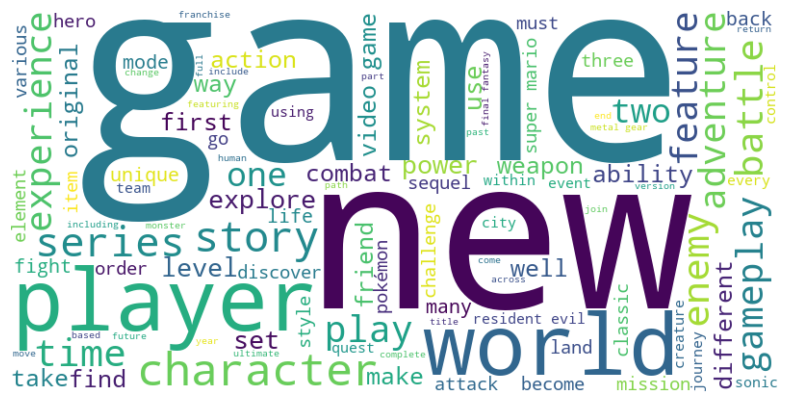

In [196]:
from wordcloud import WordCloud
text = " ".join(summary for summary in df_pop['Cleaned_Summary'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

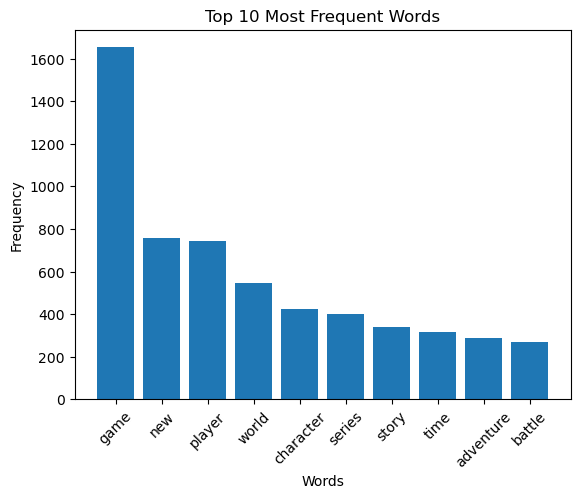

In [197]:
top_words = word_counts_sorted[:10]
words = [word[0] for word in top_words]
counts = [word[1] for word in top_words]

plt.bar(words, counts)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [199]:
!pip install textblob


     ------------------------------------ 636.8/636.8 kB 872.6 kB/s eta 0:00:00


In [201]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df_pop['Sentiment'] = df_pop['Cleaned_Summary'].apply(get_sentiment)

In [202]:
df_pop.head()
#negative sentiment is -1, neutral is 0 and 1 is positive

,Genres,Number of Reviews,Rating,Summary,Team,Title,Cleaned_Summary,Sentiment
0,"['Adventure', 'RPG']",3900,4.5,"Elden Ring is a fantasy, action and open world...","['Bandai Namco Entertainment', 'FromSoftware']",Elden Ring,elden ring fantasy action open world game rpg ...,-0.100000
1,"['Adventure', 'Brawler', 'Indie', 'RPG']",2900,4.3,A rogue-lite hack and slash dungeon crawler in...,['Supergiant Games'],Hades,hack slash dungeon crawler zagreus son hades g...,-0.100000
2,"['Adventure', 'RPG']",4300,4.4,The Legend of Zelda: Breath of the Wild is the...,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild,legend zelda breath wild first game zelda seri...,0.102381
3,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",3500,4.2,"A small child falls into the Underground, wher...","['tobyfox', '8-4']",Undertale,small child fall underground monster long bani...,-0.042857
4,"['Adventure', 'Indie', 'Platform']",3000,4.4,A 2D metroidvania with an emphasis on close co...,['Team Cherry'],Hollow Knight,metroidvania emphasis close combat exploration...,0.187500


In [218]:
grouped_by_genre = df_pop.groupby('Genres')

grouped_by_genre['Rating'].mean() #out of five stars

Genres
['Adventure', 'Arcade', 'Brawler', 'Fighting']                   3.600000
['Adventure', 'Arcade', 'Fighting', 'Indie']                     3.500000
['Adventure', 'Arcade', 'Indie', 'Music', 'Platform']            3.100000
['Adventure', 'Arcade', 'Indie', 'Music']                        3.900000
['Adventure', 'Arcade', 'Indie', 'Platform', 'Puzzle', 'RPG']    4.000000
                                                                   ...   
['Simulator']                                                    3.760000
['Sport']                                                        3.457143
['Strategy', 'Tactical']                                         3.800000
['Visual Novel']                                                 3.300000
[]                                                               3.650000
Name: Rating, Length: 255, dtype: float64

In [219]:
grouped_by_genre['Title'].count()

Genres
['Adventure', 'Arcade', 'Brawler', 'Fighting']                   1
['Adventure', 'Arcade', 'Fighting', 'Indie']                     1
['Adventure', 'Arcade', 'Indie', 'Music', 'Platform']            1
['Adventure', 'Arcade', 'Indie', 'Music']                        1
['Adventure', 'Arcade', 'Indie', 'Platform', 'Puzzle', 'RPG']    1
                                                                ..
['Simulator']                                                    5
['Sport']                                                        7
['Strategy', 'Tactical']                                         1
['Visual Novel']                                                 1
[]                                                               2
Name: Title, Length: 255, dtype: int64